In [3]:
library(tidyverse)

# Ordering by frequency

**`fct_infreq()`**: For each category, calculate its frequency in the data, the order categories by frequency descending. By default, NA is put at the top 

Let’s try answering the question, “what are the most common hair colors of star wars characters?” Let’s start off by making a bar plot:

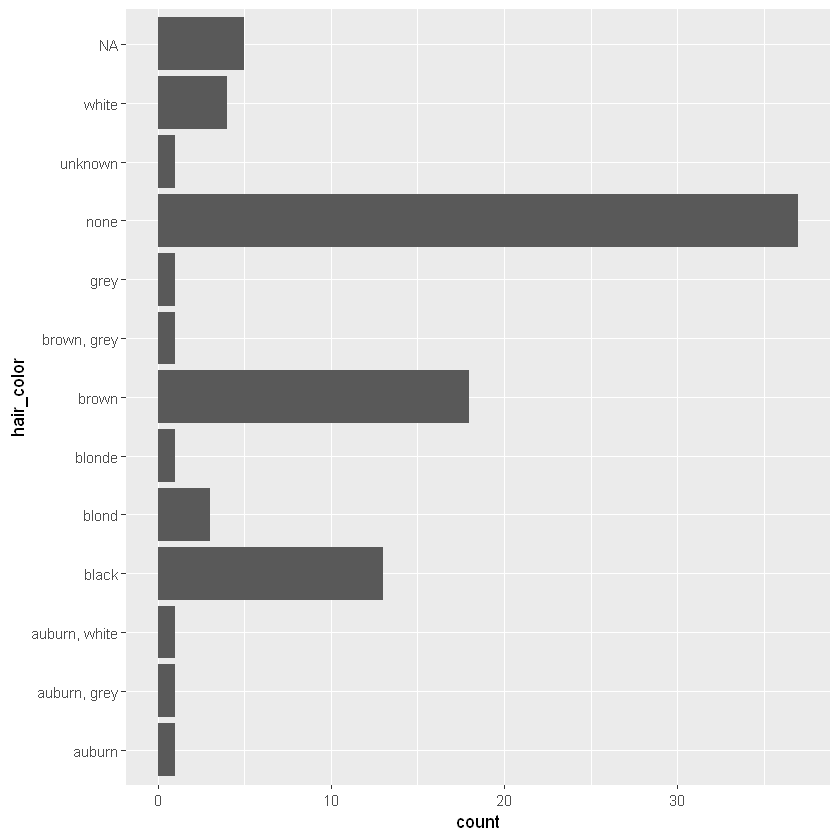

In [16]:
starwars %>% ggplot(aes(y = hair_color)) + 
geom_bar()

That’s okay, but it would be more helpful the graph was ordered by count. This is a case of an unordered categorical variable where we want it ordered by its frequency. To do so, we can use the function **`fct_infreq()`**:

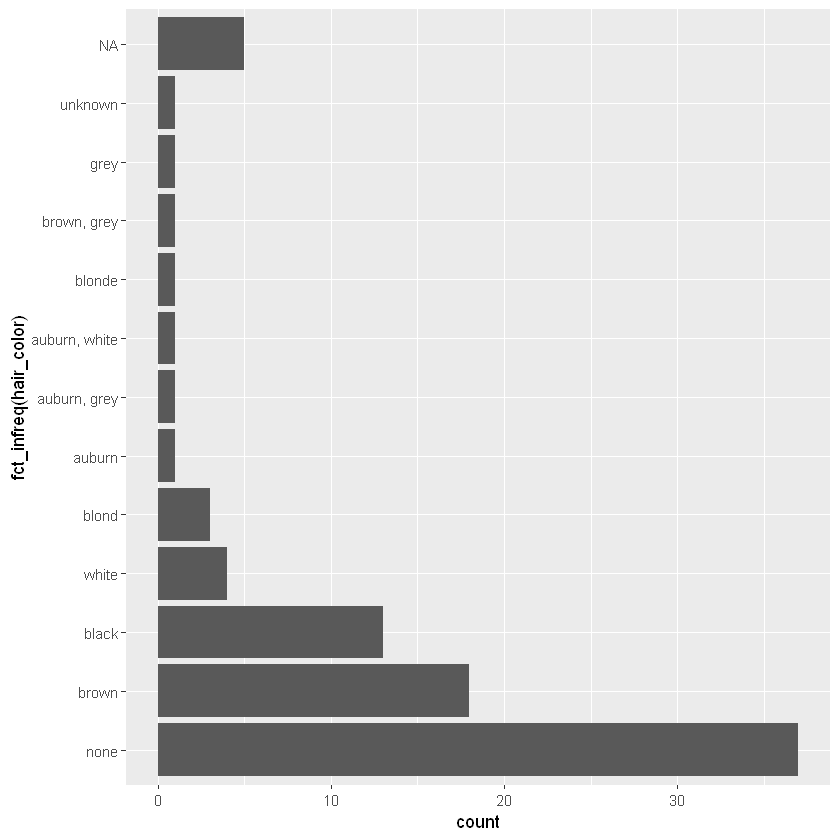

In [18]:
starwars %>% ggplot(aes(y = fct_infreq(hair_color))) + 
geom_bar() 

# Combining levels

Let’s take a look at skin color now:

In [22]:
starwars %>% count(skin_color, sort = T)

skin_color,n
fair,17
light,11
dark,6
green,6
grey,6
pale,5
brown,4
blue,2
"blue, grey",2
orange,2


We see that there’s 31 different skin colors - if we want to make a plot this would be way too many to display! Let’s reduce it to only be the top 5. We can use **`fct_lump()`** to “lump” all the infrequent colors into one factor, “other.” The argument n is the number of levels we want to keep.

In [23]:
starwars %>% mutate(skin_color = fct_lump(skin_color, n = 5)) %>% count(skin_color, sort = T)

skin_color,n
Other,41
fair,17
light,11
dark,6
green,6
grey,6


We could also have used `prop` instead, which keeps all the levels that appear at least prop of the time. For example, let’s keep skin colors that at least 10% of the characters have:

In [25]:
starwars %>% mutate(skin_color = fct_lump(skin_color, prop = .1)) %>% count(skin_color, sort = T)

skin_color,n
Other,59
fair,17
light,11


If you wanted to call it something than “other”, you can change it with the argument `other_level`:

In [26]:
starwars %>% mutate(skin_color = fct_lump(skin_color, n = 5, other_level = 'Other skin color')) %>% count(skin_color, sort = T)

skin_color,n
Other skin color,41
fair,17
light,11
dark,6
green,6
grey,6


What if we wanted to see if the average mass differed by skin color? We’ll only look at the 6 most popular eye colors and remove NAs.

In [33]:
avg_mass_eye_color<- starwars %>% 
mutate(skin_color = fct_lump(skin_color, n = 6)) %>% 
group_by(skin_color) %>% summarize(mean_mass = mean(mass, na.rm = T))

avg_mass_eye_color

`summarise()` ungrouping output (override with `.groups` argument)


skin_color,mean_mass
dark,74.50000
fair,83.57778
green,74.20000
grey,79.50000
light,75.85714
pale,68.33333
Other,120.97037


# Ordering by another variable 

**`fct_reorder()`**: work like **`reorder()`**

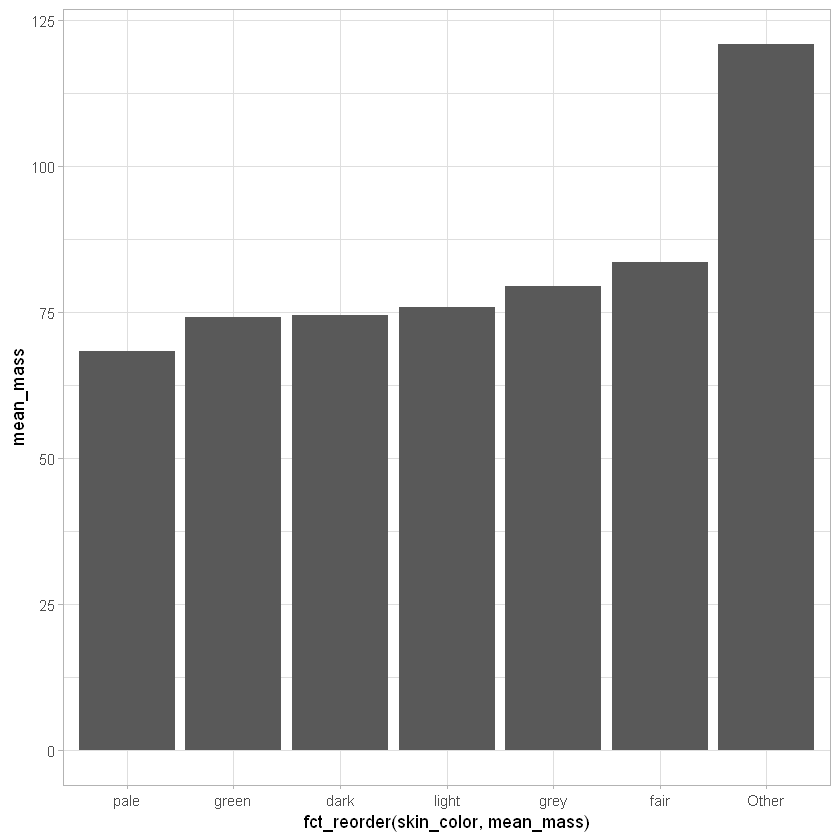

In [36]:
avg_mass_eye_color %>% 
ggplot(aes(fct_reorder(skin_color, mean_mass), mean_mass)) + geom_col() + theme_light()

# Manually reordering

Let’s switch to using another dataset, `gss_cat`, the general social survey. What is the income distribution among the respondents?

In [37]:
gss_cat %>% glimpse()

Rows: 21,483
Columns: 9
$ year    <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,...
$ marital <fct> Never married, Divorced, Widowed, Never married, Divorced, ...
$ age     <int> 26, 48, 67, 39, 25, 25, 36, 44, 44, 47, 53, 52, 52, 51, 52,...
$ race    <fct> White, White, White, White, White, White, White, White, Whi...
$ rincome <fct> $8000 to 9999, $8000 to 9999, Not applicable, Not applicabl...
$ partyid <fct> "Ind,near rep", "Not str republican", "Independent", "Ind,n...
$ relig   <fct> Protestant, Protestant, Protestant, Orthodox-christian, Non...
$ denom   <fct> Southern baptist, Baptist-dk which, No denomination, Not ap...
$ tvhours <int> 12, NA, 2, 4, 1, NA, 3, NA, 0, 3, 2, NA, 1, NA, 1, 7, NA, 3...


In [39]:
gss_cat %>% count(rincome)

rincome,n
No answer,183
Don't know,267
Refused,975
$25000 or more,7363
$20000 - 24999,1283
$15000 - 19999,1048
$10000 - 14999,1168
$8000 to 9999,340
$7000 to 7999,188
$6000 to 6999,215


Notice that the income levels are in the correct order - they start with the non-answers and then go from highest to lowest. This is the same order you’d see if you plotted it as a bar chart. This is not a coincidence. When you’re working with ordinal data, where there is an order, you can have an ordered factor. You can examine them with the base function `levels()`, which prints them in order:

In [40]:
gss_cat %>% pull(rincome) %>% levels()

[1] "No answer"      "Don't know"     "Refused"        "$25000 or more"
 [5] "$20000 - 24999" "$15000 - 19999" "$10000 - 14999" "$8000 to 9999" 
 [9] "$7000 to 7999"  "$6000 to 6999"  "$5000 to 5999"  "$4000 to 4999" 
[13] "$3000 to 3999"  "$1000 to 2999"  "Lt $1000"       "Not applicable"

But what if your factor came in the wrong order? Let’s simulate that by reordering the levels of rincome randomly with **`fct_shuffle()`**:

In [42]:
reshuffled_income <- gss_cat %>% pull(rincome) %>% fct_shuffle()

reshuffled_income %>% levels()

[1] "$8000 to 9999"  "$7000 to 7999"  "No answer"      "$20000 - 24999"
 [5] "Lt $1000"       "$4000 to 4999"  "Refused"        "$5000 to 5999" 
 [9] "$1000 to 2999"  "Not applicable" "$25000 or more" "Don't know"    
[13] "$15000 - 19999" "$10000 - 14999" "$6000 to 6999"  "$3000 to 3999"

We can use the function `fct_relevel()` when we need to manually reorder our factor levels. In addition to the factor, you give it a character vector of level names, and specify where you want to move them. It defaults to moving them to the front, but you can move them after another level with the argument `after`. If you want to move it to the end, you set after `equal` to `Inf`.

For example, let’s say we wanted to move `Lt $1000` and `$1000 to 2999` to the front. We would write:

In [45]:
reshuffled_income %>% fct_relevel(c('Lt $1000', '$1000 to 2999')) %>% levels()

[1] "Lt $1000"       "$1000 to 2999"  "$8000 to 9999"  "$7000 to 7999" 
 [5] "No answer"      "$20000 - 24999" "$4000 to 4999"  "Refused"       
 [9] "$5000 to 5999"  "Not applicable" "$25000 or more" "Don't know"    
[13] "$15000 - 19999" "$10000 - 14999" "$6000 to 6999"  "$3000 to 3999"

What if we want to move them to the second and third place?

In [47]:
reshuffled_income %>% fct_relevel(c('Lt $1000', '$1000 to 2999'), after = 1) %>% levels()

[1] "$8000 to 9999"  "Lt $1000"       "$1000 to 2999"  "$7000 to 7999" 
 [5] "No answer"      "$20000 - 24999" "$4000 to 4999"  "Refused"       
 [9] "$5000 to 5999"  "Not applicable" "$25000 or more" "Don't know"    
[13] "$15000 - 19999" "$10000 - 14999" "$6000 to 6999"  "$3000 to 3999"